In [1]:
import pandas as pd 
import seaborn as sns

hex_salmon = '#F68F83'
hex_gold = '#BC9661'
hex_indigo = '#2D2E5F'
hex_maroon = '#8C4750'
hex_white = '#FAFAFA'
hex_blue = '#7EB5D2'

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
mpl.rcParams['font.family'] = 'SF Compact Text'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'semibold'
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[hex_indigo, hex_salmon, hex_maroon])
mpl.rcParams["figure.titlesize"] = 'large'
mpl.rcParams["figure.titleweight"] = 'semibold'

from termcolor import colored

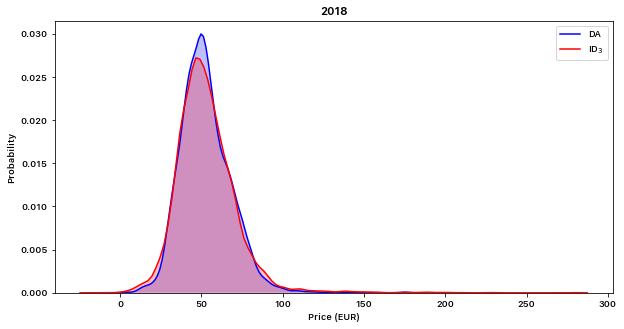

In [2]:
DA = pd.read_pickle(f"./DA.pkl")
ID = pd.read_pickle(f"./ID3.pkl")

DA = DA.set_index('Instrument')
ID = ID.set_index('Instrument')

year = 2018

DA = DA.loc[(DA.index.year == year)]
ID = ID.loc[(ID.index.year == year)]

# Plotting the KDE Plot 
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(DA['MCP'], color = 'b', shade = True, label = r'DA')
sns.kdeplot(ID['ID3'], color = 'r', shade = True, label = r'ID$_3$')

ax.set_title(f'{year}')
ax.set_xlabel(r'Price (EUR)')
ax.set_ylabel(r'Probability');

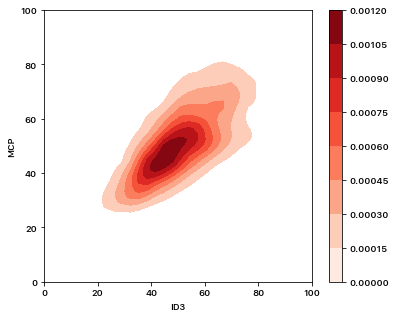

In [3]:
price = pd.merge(DA, ID, left_index=True, right_index=True, how='outer')

price = price.dropna()
price = price.reset_index()

fig, ax = plt.subplots(figsize=(6, 5))

# Plotting the KDE Plot 
x = price['ID3']
y = price['MCP']
sns.kdeplot(x, y, color='r', shade=True, cmap="Reds", shade_lowest=False, cbar=True);

ax.set_xlim(0, 100)
ax.set_ylim(0, 100);

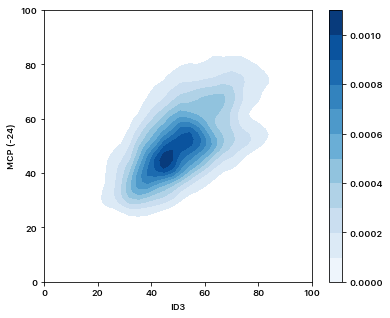

In [4]:
lag = 24
price[f'MCP (-{lag})'] = price['MCP'].shift(-lag)
price[f'ID3 (-{lag})'] = price['ID3'].shift(-lag)
price = price.dropna()

fig, ax = plt.subplots(figsize=(6, 5))

# Plotting the KDE Plot 
x = price['ID3']
y = price[f'MCP (-{lag})']
sns.kdeplot(x, y, color='r', shade=True, cmap="Blues", shade_lowest=False, cbar=True);

ax.set_xlim(0, 100)
ax.set_ylim(0, 100);


Processing: Month 1



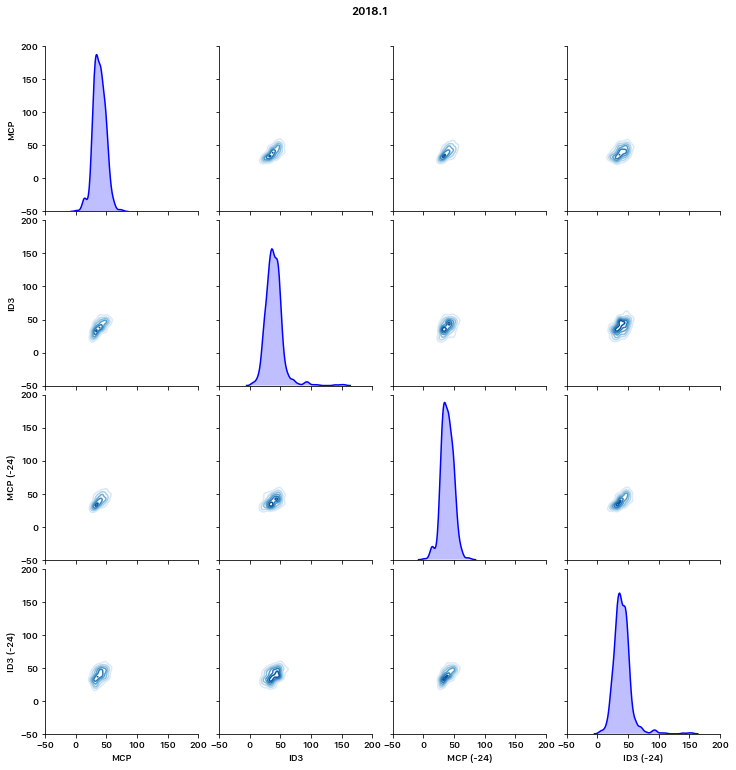


Processing: Month 2



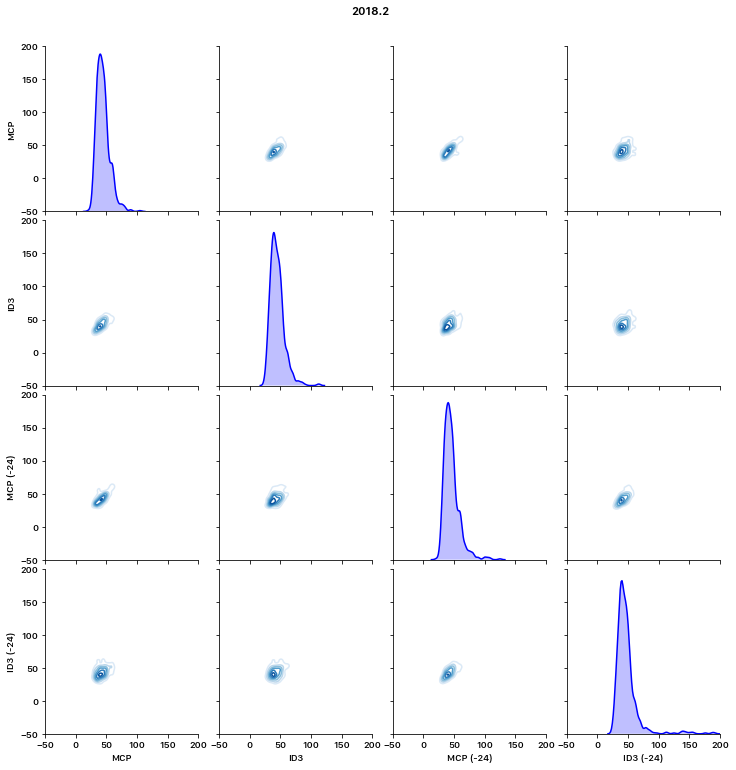


Processing: Month 3



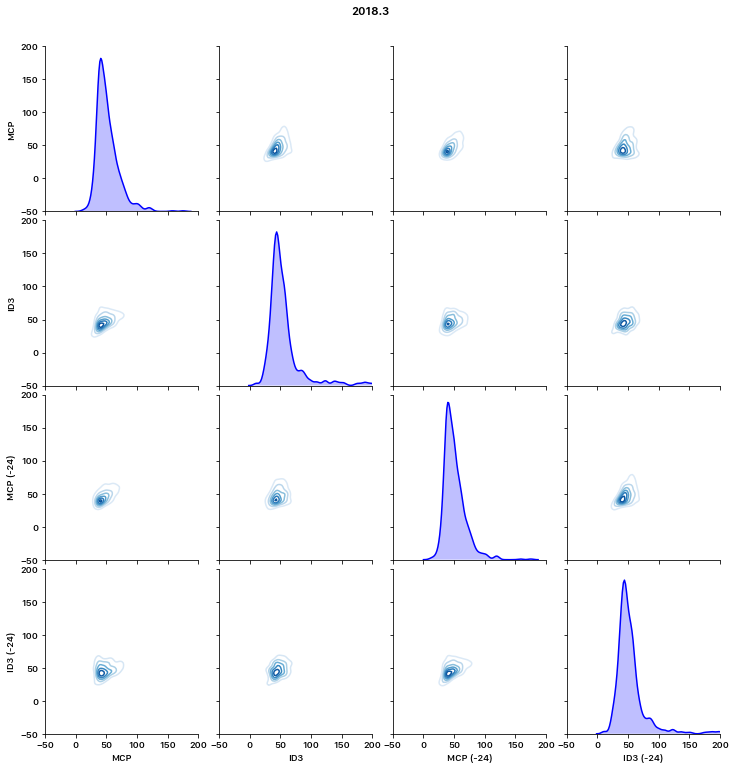


Processing: Month 4



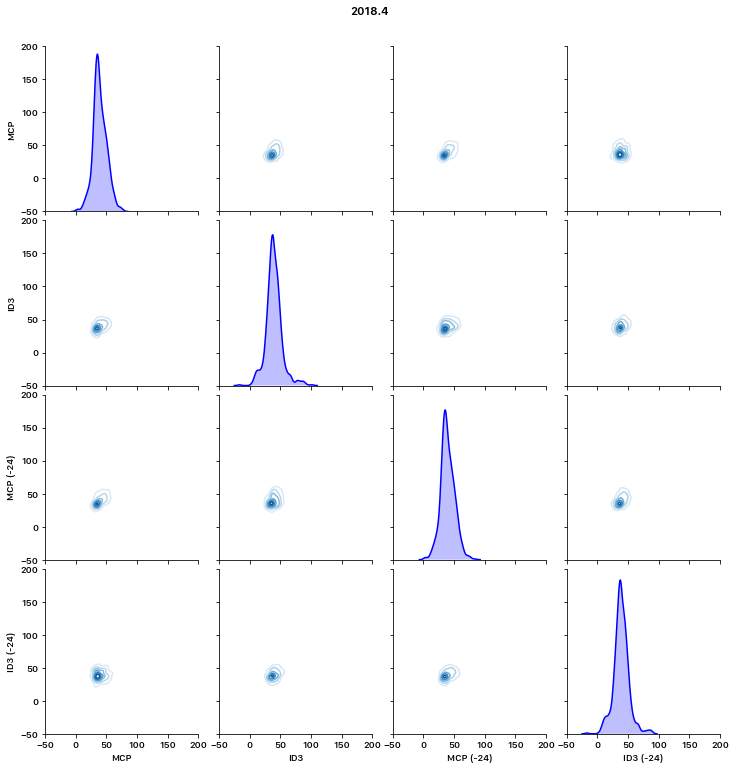


Processing: Month 5



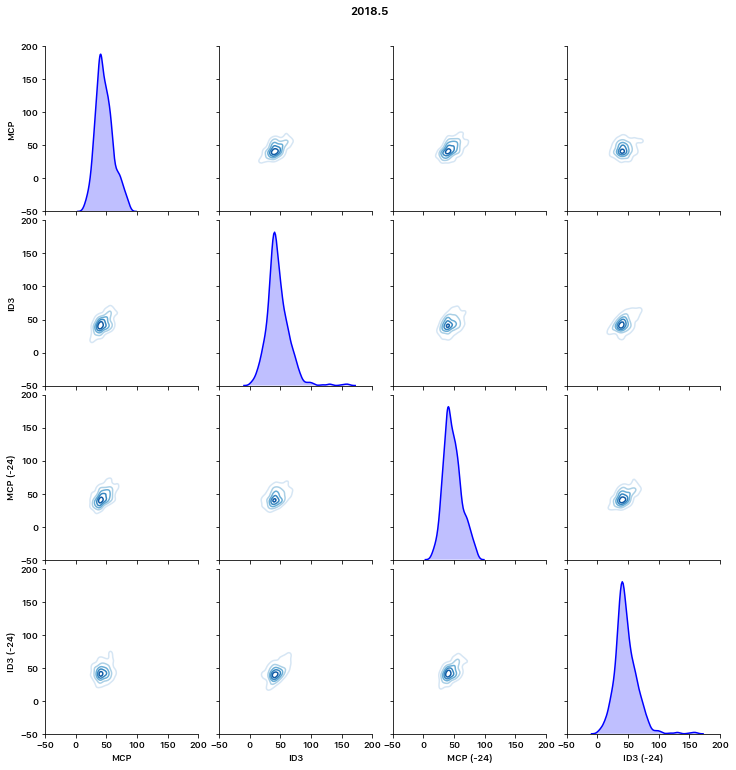


Processing: Month 6



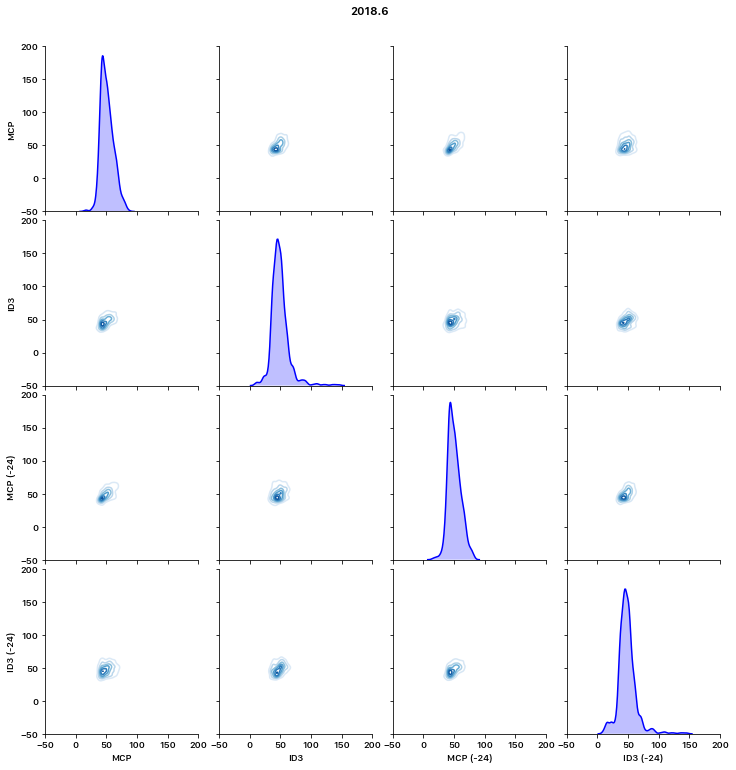


Processing: Month 7



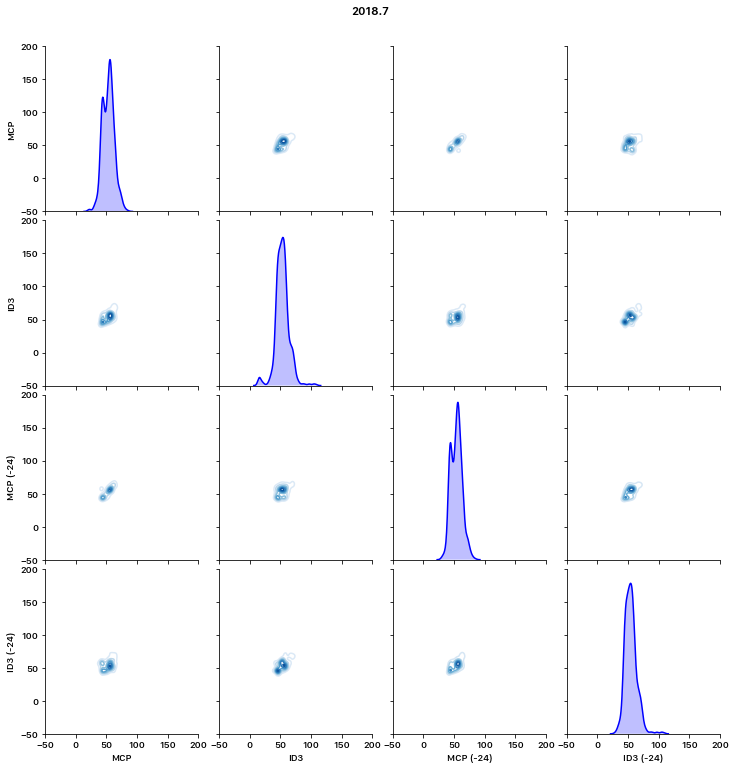


Processing: Month 8



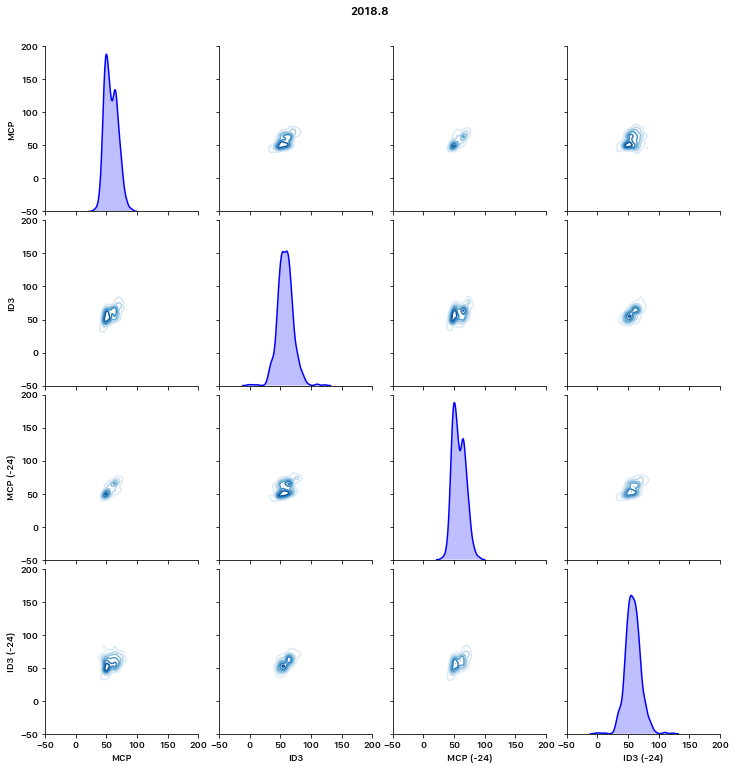


Processing: Month 9



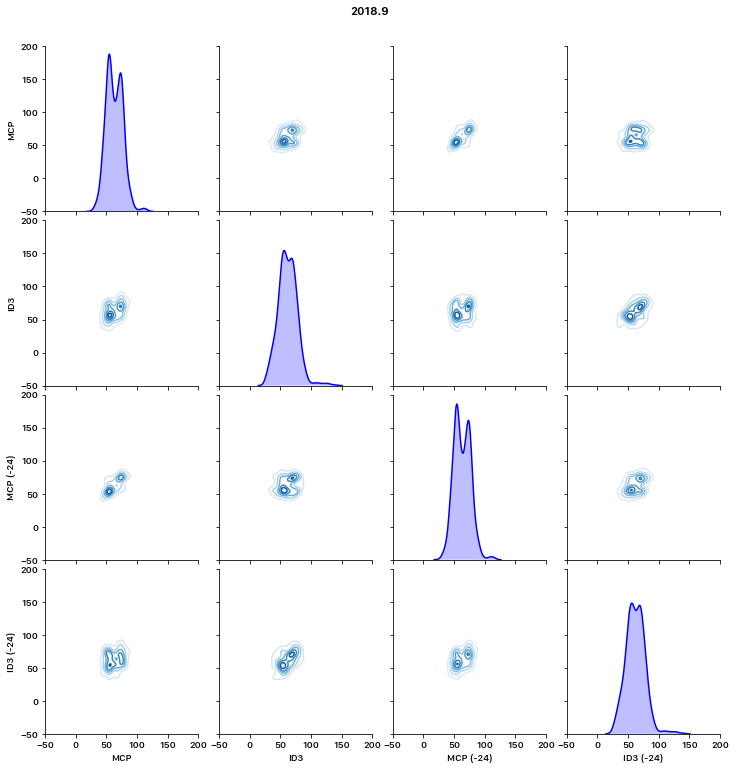


Processing: Month 10



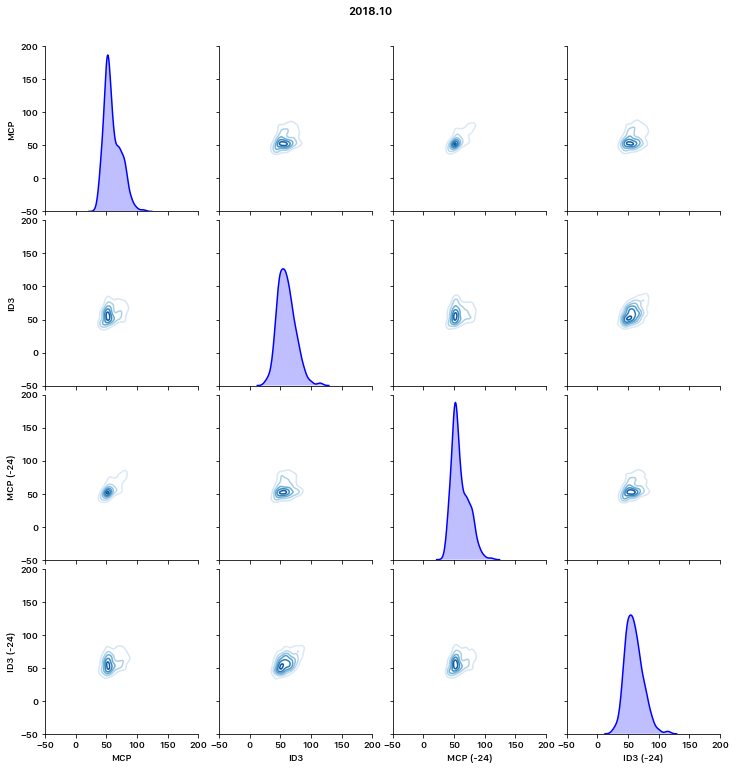


Processing: Month 11



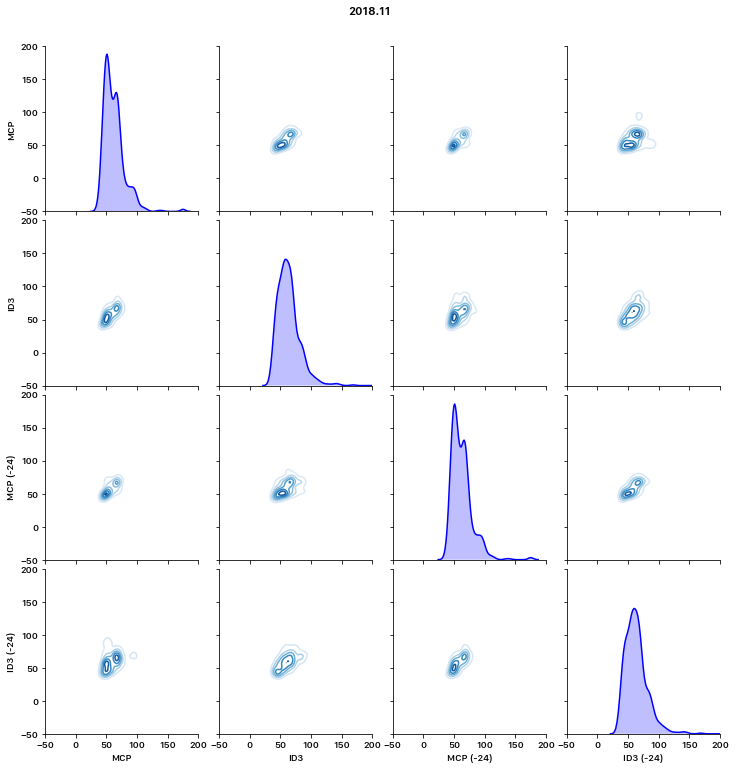


Processing: Month 12



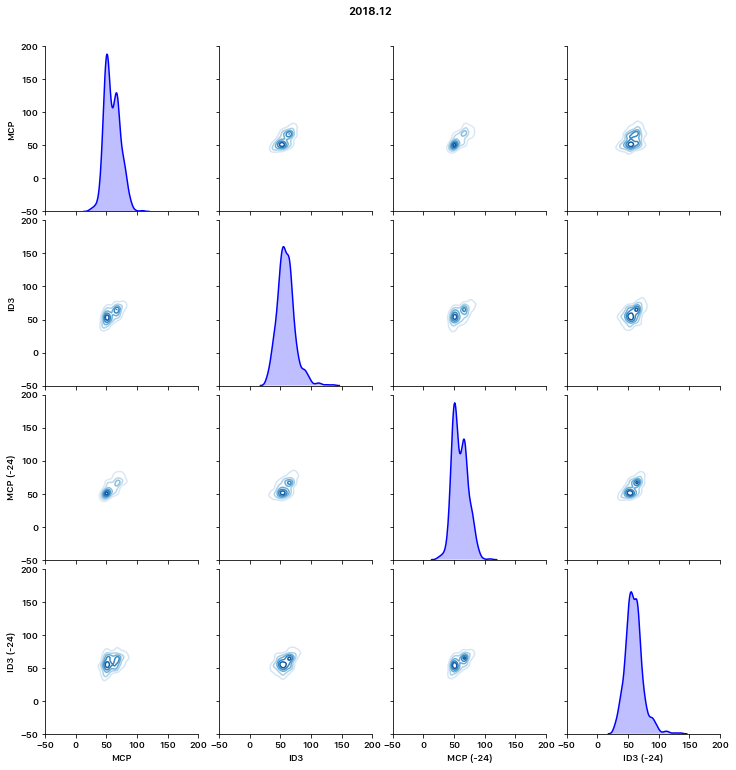

In [5]:
for month in range(1, 13):
    price_month = price.loc[(price['Instrument'].dt.month == month)]
    
    print(), print(colored(f'Processing: Month {month}', 'blue')), print()

    # plt.figure()

    g = sns.PairGrid(price_month)
    g.map_diag(sns.kdeplot, color = 'b', shade = True)
    g.map_offdiag(sns.kdeplot, n_levels=6, cmap="Blues")

    g.set(xlim=(-50, 200), ylim=(-50, 200))

    g.fig.suptitle(f'{year}.{month}', y = 1.05)

    plt.show()